#  House Price Prediction

## 1. Import Required Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


## 2. Load the Dataset
 

In [4]:
df = pd.read_csv("dataset/HousePricePrediction.csv")

df.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## 3. Exploratory Data Analysis (EDA)

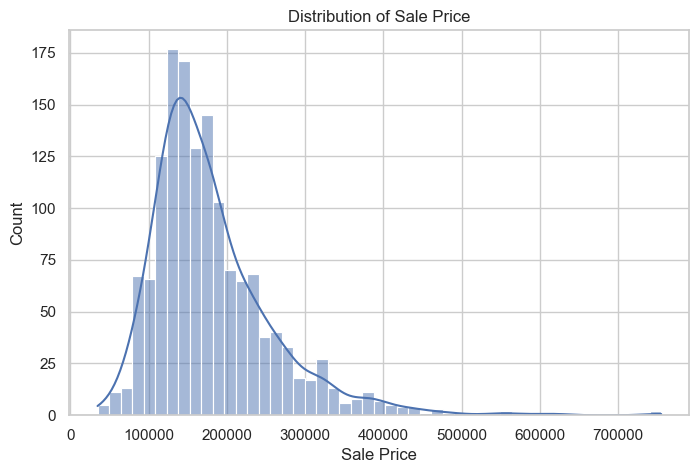

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

### Box Plot for Outlier Detection


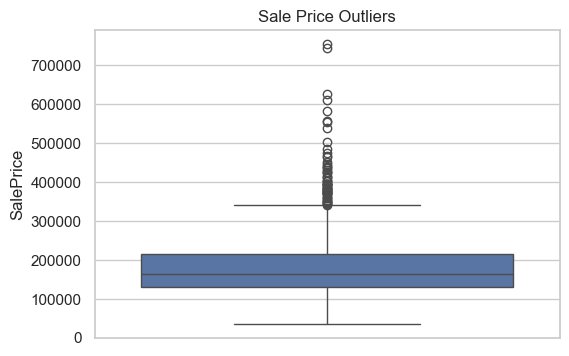

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["SalePrice"])
plt.title("Sale Price Outliers")
plt.show()


### Total Basement Area vs Sale Price


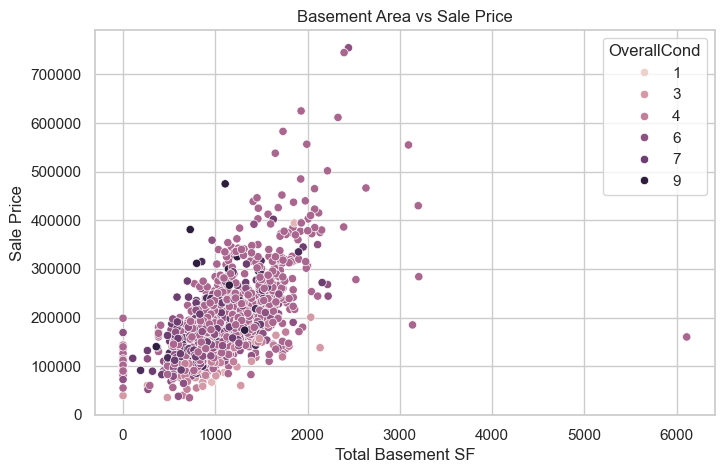

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["TotalBsmtSF"],
    y=df["SalePrice"],
    hue=df["OverallCond"]
)
plt.title("Basement Area vs Sale Price")
plt.xlabel("Total Basement SF")
plt.ylabel("Sale Price")
plt.show()


### Living Area vs Sale Price


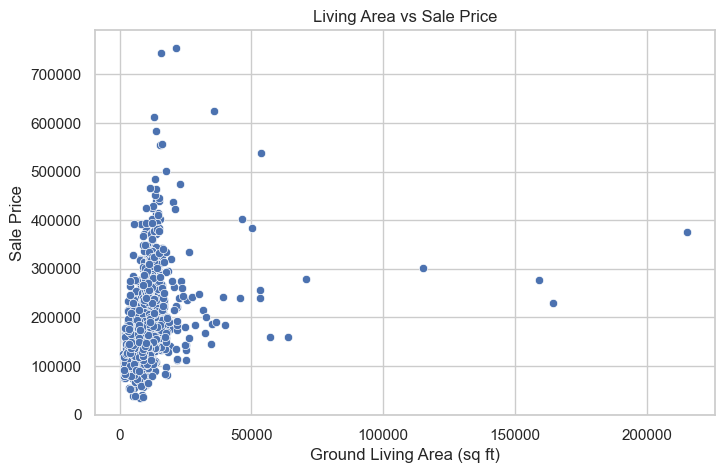

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["LotArea"],
    y=df["SalePrice"]
)
plt.title("Living Area vs Sale Price")
plt.xlabel("Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


In [9]:
## 4. Data Cleaning


In [10]:
#dropping Irrelevant or High-NaN Columns
df = df.drop(columns=[
    "Id",
    "YearRemodAdd",
    "Exterior1st",
    "BsmtFinSF2"
])

#dropping Rows with Missing Target Values
df = df.dropna(subset=["SalePrice"])

## 5. Feature and Target Separation

In [11]:
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]


## 6. Feature Encoding


In [12]:
#One-hot encode categorical features
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#Convert boolean columns to integers
bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)


## 7. Train-Test Split


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)


## 8. Model Training and Evaluation


In [14]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

Y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(Y_test, Y_pred_lr)

r2_lr

0.6039722799669369

### Ridge Regression (L2 Regularization)


In [15]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

Y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

r2_ridge


0.6040018923711579

### Lasso Regression (L1 Regularization)


In [16]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, Y_train)

Y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

r2_lasso


0.6039722331368249

## 9. Model Performance Comparison

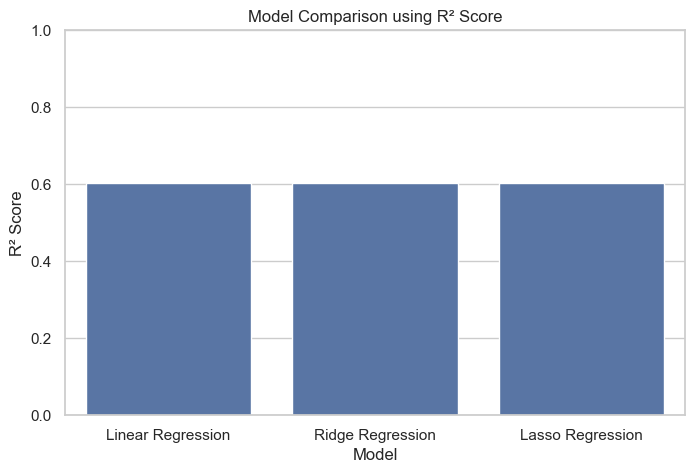

In [17]:
#R² Score Comparison Table

results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [r2_lr, r2_ridge, r2_lasso]
})

results_df

#R² Score Comparison Visualization

plt.figure(figsize=(8, 5))
sns.barplot(
    x="Model",
    y="R2 Score",
    data=results_df
)
plt.title("Model Comparison using R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()


In [21]:
import pickle

# Save the baseline trained model to a file
with open("models/lr_model.pkl", "wb") as file:  #
    pickle.dump(lr_model, file)


# Save the Ridge trained model to a file
with open("models/ridge_model.pkl", "wb") as file:  #
    pickle.dump(ridge_model, file)

# Save the lasso trained model to a file
with open("models/lasso_model.pkl", "wb") as file:  #
    pickle.dump(lasso_model, file)

In [23]:
import pkg_resources

# List of the packages you know you're using
required_packages = [
    'numpy',
    'pandas',
    'scikit-learn',
    'matplotlib',
    'seaborn',
    'ipykernel',
]

requirements = []

for package in required_packages:
    try:
        version = pkg_resources.get_distribution(package).version
        requirements.append(f"{package}=={version}")
    except pkg_resources.DistributionNotFound:
        print(f"Package {package} not found in the environment.")

#requirements to a file
with open('models/requirements.txt', 'w') as f:
    for line in requirements:
        f.write(line + '\n')